In [1]:
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re

In [2]:
dirName = os.getcwd()+'\\train'
filenames = os.listdir(dirName)
Node_Types = []
Edge_Types = []
for filename in filenames:
    if filename.endswith(".gexf"):
        #print(filename)
        temp =  nx.read_gexf(path=dirName+"\\"+filename)
        for node in temp.nodes:
            temp_type = temp.nodes[node]['type']
            if temp_type not in Node_Types:
                Node_Types.append(temp_type)
        for edge in temp.edges:
            temp_type = temp.edges[edge]['valence']
            if temp_type not in Edge_Types:
                Edge_Types.append(temp_type)

print(Node_Types)
print(Edge_Types)

['C', 'N', 'O', 'S', 'Pt', 'Cl', 'Si', 'I', 'Tb', 'Bi', 'Br', 'As', 'P', 'Co', 'B', 'F', 'Ru', 'Pb', 'Sb', 'Cu', 'Ho', 'Pd', 'Sn', 'Li', 'Hg', 'Ga']
[2, 1, 3]


10 nodes:
 ['7', '3', '5', '8', '6', '1', '9', '0', '4', '2']
9 edges:
 [('7', '3'), ('3', '1'), ('3', '8'), ('3', '9'), ('5', '2'), ('6', '2'), ('1', '0'), ('0', '2'), ('4', '2')]


D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


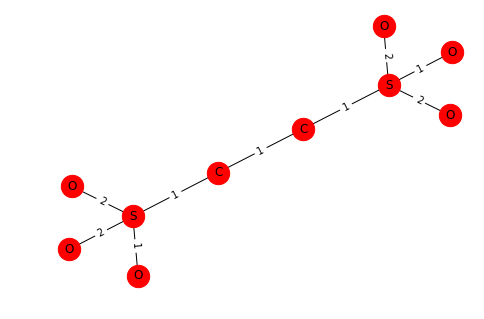

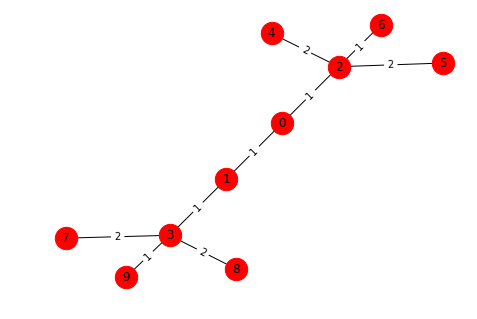

In [3]:
color_set = []
for i in range(0,len(Node_Types)):
    r = lambda: random.randint(0,255)
    color_set.append('#{:02x}{:02x}{:02x}'.format(r(), r(), r()))

def draw_type(g):
#    node_color_lst = []
#    node_type_lst =  []
#    for node in list(g.nodes()):
#        temp = g.node[node]['type']
#        if temp not in node_type_lst:
#            index = Node_Types.index(temp)
#            node_color_lst.append(color_set[index])
#            node_type_lst.append(temp)

    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'type')

    #nx.draw(g, pos, labels=node_labels, edge_labels=edge_labels, node_size=500, node_color=node_color_lst)
    nx.draw(g, pos, labels=node_labels, edge_labels=edge_labels, node_size=500)
    nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
    pylab.show()



def draw_id(g):
    pos = nx.spring_layout(g)
    edge_labels = dict([((n1, n2), d['valence']) for n1, n2, d in g.edges(data=True)])
    node_labels = nx.get_node_attributes(g, 'label')
    nx.draw(g,pos,labels=node_labels,edge_labels=edge_labels, node_size=500)
    nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
    pylab.show()

def draw(g):
    draw_type(g)
    draw_id(g)

g = nx.read_gexf(path="./train/4.gexf")
print(str(g.number_of_nodes())+" nodes:\n",list(g.nodes))
print(str(g.number_of_edges())+" edges:\n",list(g.edges))
draw(g)

In [26]:
for node in g.nodes:
    print(g.nodes[node]['label'],'->', g.nodes[node]['type'])

7 -> O
3 -> S
5 -> O
8 -> O
6 -> O
1 -> C
9 -> O
0 -> C
4 -> O
2 -> S


In [28]:
prin)t(dict([((n1, n2), d['valence'])
                    for n1, n2, d in g.edges(data=True)]))

{('7', '3'): 2, ('3', '1'): 1, ('3', '8'): 2, ('3', '9'): 1, ('5', '2'): 2, ('6', '2'): 1, ('1', '0'): 1, ('0', '2'): 1, ('4', '2'): 2}


In [29]:
print(dict([(n1, d['type']) for n1,  d in g.nodes(data=True)]))

{'7': 'O', '3': 'S', '5': 'O', '8': 'O', '6': 'O', '1': 'C', '9': 'O', '0': 'C', '4': 'O', '2': 'S'}


In [30]:
g.node['7']['type']

'O'

In [31]:
nx.get_edge_attributes(g,'valence')

{('7', '3'): 2,
 ('3', '1'): 1,
 ('3', '8'): 2,
 ('3', '9'): 1,
 ('5', '2'): 2,
 ('6', '2'): 1,
 ('1', '0'): 1,
 ('0', '2'): 1,
 ('4', '2'): 2}

In [4]:
g = nx.read_gexf(path="./train/4.gexf")

def GPG(g, NR, NID, ER, EID):
    Del_Edge = []
    G = g
    ED = random.randint(0, EID)
    # draw(g)
    print("Edge Deletion",ED)#max to the edge number?
    print("Edge Insertion",EID-ED)
    NR = random_node_relabeling(g,NR)
    NID = random_node_insertion(g,NID)
    ED, Del_Edge = random_edge_deletion(g,ED)
    ER = random_edge_relabeling(g,ER)
    EI = random_edge_insertion(g,EID-ED, Del_Edge)
    EID = EI +ED
    print("NR,NID,ER,EI,ED: ",NR,NID,ER,EI,ED)
    GEV = NR + NID + ER + EID
    print("GEV_SUM:", GEV)
    gev_info = "_NR_"+str(NR)+"_NID_"+str(NID)+"_ER_"+str(ER)+"_EID_"+str(EID)
    return gev_info

for filename in filenames:
    if filename.endswith(".gexf"):
        print("->"+filename)
        g =  nx.read_gexf(path=dirName+"\\"+filename)
        gev_info = GPG(g, random.randint(0, 5),random.randint(0, 5),random.randint(0, 5),random.randint(0, 5))
        nx.write_gexf(G=g, path="./export/"+filename[:-5]+gev_info+".gexf")
        print("<-"+filename[:-5]+gev_info+".gexf")

# GPG(g, random.randint(0, 5),random.randint(0, 5),random.randint(0, 5),random.randint(0, 5))
# draw_type(g)


->10092.gexf
Edge Deletion 1
Edge Insertion 3


NameError: name 'random_node_relabeling' is not defined

In [32]:


filename = "4_NR_0_NID_3_ER_2_EID_2.gexf"
g = nx.read_gexf(path="./export/"+filename)
# draw(g)
reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
er =  int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
gev = nr+nid+er+eid
print('ori',ori, 'nr',nr, 'nid',nid, 'er',er, 'eid',eid,'gev',gev)

g_ori = nx.read_gexf(path="./train/"+ori+".gexf")
# draw(g_ori)
# print(nx.adjacency_matrix(g))

import json

nlm0 ={}
for node in g_ori.nodes():
    t = g_ori.nodes[node]['type']
    # print(t)
    dic = {t:1}
    str_key = json.dumps(dic)
    if nlm0.get(str_key):
        nlm0[str_key] = nlm0.get(str_key)+1
    else:
        nlm0[str_key] = 1

print('nlm0',nlm0)

nlm1 ={}
for node in g_ori.nodes():
    neighbors = [n for n in g_ori.neighbors(node)]
    # print(neighbors)
    dic = {}
    for neighbor in neighbors:
        t = g_ori.nodes[neighbor]['type']
        # print(t)
        if dic.get(t):
            dic[t] = dic.get(t)+1
        else:
            dic[t] = 1

    # print(dic)
    # print(json.dumps(dic))
    if nlm1.get(json.dumps(dic)):
            nlm1[json.dumps(dic)] = nlm1.get(json.dumps(dic))+1
    else:
            nlm1[json.dumps(dic)] = 1

    # print('----------------')
print("nlm1",nlm1)

ori 4 nr 0 nid 3 er 2 eid 2 gev 7
nlm0 {'{"O": 1}': 6, '{"S": 1}': 2, '{"C": 1}': 2}
nlm1 {'{"S": 1}': 6, '{"O": 3, "C": 1}': 2, '{"S": 1, "C": 1}': 1, '{"C": 1, "S": 1}': 1}


elm0 {'{"2": 1}': 4, '{"1": 1}': 5}
('7', '3')
{'type': 'O', 'label': '7'}
('3', '1')
{'type': 'S', 'label': '3'}
('3', '8')
{'type': 'S', 'label': '3'}
('3', '9')
{'type': 'S', 'label': '3'}
('5', '2')
{'type': 'O', 'label': '5'}
('6', '2')
{'type': 'O', 'label': '6'}
('1', '0')
{'type': 'C', 'label': '1'}
('0', '2')
{'type': 'C', 'label': '0'}
('4', '2')
{'type': 'O', 'label': '4'}


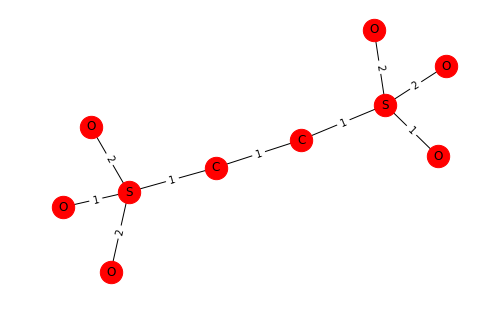

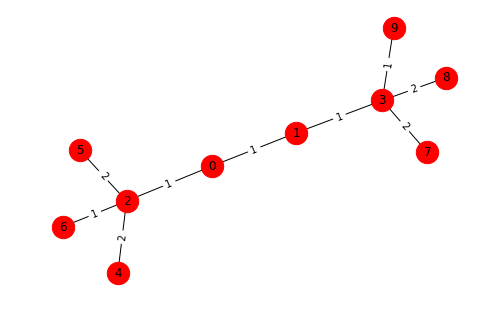

In [49]:
elm0 ={}
for edge in g_ori.edges():
    t = g_ori.edges[edge]['valence']
    # print(t)
    dic = {t:1}
    str_key = json.dumps(dic)
    if elm0.get(str_key):
        elm0[str_key] = elm0.get(str_key)+1
    else:
        elm0[str_key] = 1

print('elm0',elm0)

elm1 ={}
for edge in g_ori.edges():
    print(edge)
    print(g_ori.nodes[edge[0]])

draw(g_ori)

2


In [5]:
def random_node_relabeling(g, numbers):
    if numbers > g.number_of_nodes():
        numbers = g.number_of_nodes()

    # draw_type(g)
    i=1
    lst = []

    while i<=numbers:
        # print(i,"-th random_node_relabeling")
        n = random.choice(list(g.nodes))
        assigned_type = random.choice(Node_Types)
        # print(g.node[n], assigned_type, lst)
        if (n in lst) or (g.node[n]['type'] == assigned_type):
            continue
        else:
            g.node[n]['type'] = assigned_type
            lst.append(n)
            # print(g.node[n])
            # draw_type(g)
            i+=1
    return numbers
g = nx.read_gexf(path="./train/4.gexf")
print(random_node_relabeling(g,88))

10


In [6]:
def random_edge_relabeling(g, numbers):
    if numbers > g.number_of_edges():
        numbers = g.number_of_edges()

    # draw_type(g)
    i=1
    lst = []

    while i<=numbers:
        # print(i,"-th random_edge_relabeling")
        n = random.choice(list(g.edges()))
        assigned_type = random.choice(Edge_Types)
        # print(g.edges[n], assigned_type, lst)
        if (n in lst) or (g.edges[n]['valence'] == assigned_type):
            continue
        else:
            g.edges[n]['valence'] = assigned_type
            lst.append(n)
            # print(g.edges[n])
            # draw_type(g)
            i+=1
    return numbers
g = nx.read_gexf(path="./train/4.gexf")
print(random_edge_relabeling(g,99))

9


In [7]:
def random_node_insertion(g, numbers):
    i=1
    while i<=numbers:
        # print(i,"-th random_node_insertion")
        new_id = max(list(map(int, g.nodes)))+1
        g.add_node(str(new_id),label=str(new_id), type=random.choice(Node_Types))
        # draw(g)
        i+=1
        # print(g.nodes)
    return numbers

g = nx.read_gexf(path="./train/4.gexf")
random_node_insertion(g,5)

5

In [8]:

def random_edge_deletion(g, numbers):
    Del_Edge = []
    if numbers > g.number_of_edges():
        numbers = g.number_of_edges()
    i=1
    while i<=numbers:
        # print(i,"-th random_edge_deletion")
        n = random.choice(list(g.edges()))
        Del_Edge.append(n)
        g.remove_edge(n[0], n[1])
        # draw(g)
        i+=1
        # print(Del_Edge)
        # print(g.edges)
    return numbers, Del_Edge

g = nx.read_gexf(path="./train/4.gexf")
n, arr = random_edge_deletion(g,99)
print(n, arr)

9 [('7', '3'), ('5', '2'), ('0', '2'), ('3', '1'), ('6', '2'), ('1', '0'), ('3', '8'), ('3', '9'), ('4', '2')]


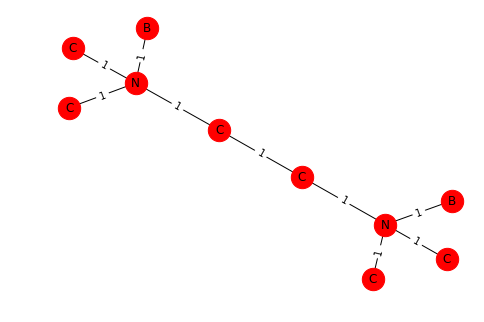

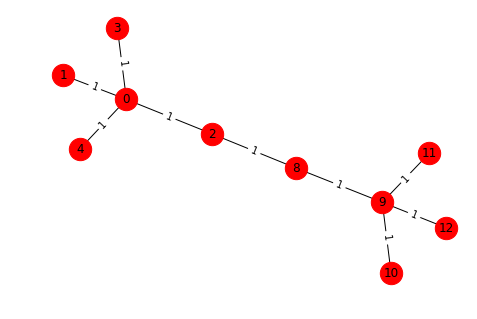

9 <class 'list'>


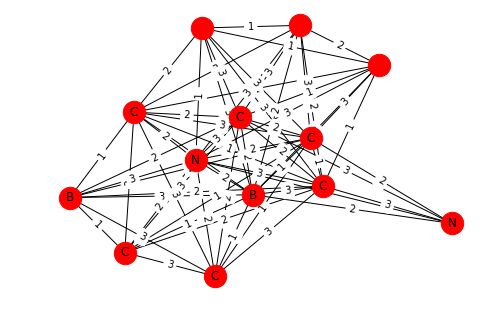

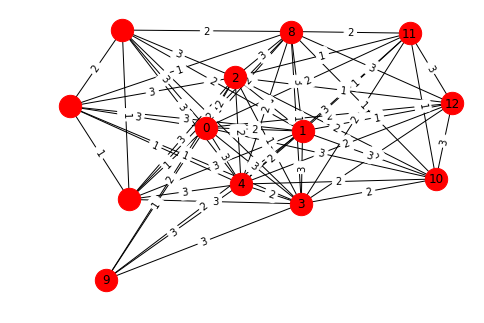

62
ei:  72


In [9]:

def random_edge_insertion(g, numbers, Del_Edge):
    pairs = set(list(g.nodes()))
    arr = []
    lst = list(g.nodes())

    for i in range(0,len(lst)):
        for j in range(i+1,len(lst)):
            arr.append((lst[i],lst[j]))
    # print(arr)

    ei_arr = list(set((a,b) if a<=b else (b,a) for a,b in arr))

    for i in range(0,n):
        for j in range(i+1,n):
            ei_arr.append((str(i),str(j)))
    # print("ei_arr",ei_arr)
    for edge in g.edges():
        # print("edge",edge)
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0],edge[1]))
        else:
            ei_arr.remove((edge[1],edge[0]))

    for edge in Del_Edge:
        if (edge[0], edge[1]) in ei_arr:
            ei_arr.remove((edge[0],edge[1]))
        else:
            ei_arr.remove((edge[1],edge[0]))
    max_edge = len(ei_arr)
    # print(max_edge)

    if numbers > max_edge:
        numbers = max_edge

    i=1
    while i<=numbers:
        # print(i,"-th random_edge_insertion")
        r = random.sample(ei_arr,1)[0]
        # print(r)
        g.add_edge(r[0],r[1],valence=random.choice(Edge_Types))
        ei_arr.remove(r)
        # draw(g)
        i+=1
        # print(g.edges)
    return numbers

g = nx.read_gexf(path="./train/5327.gexf")
draw(g)
ed, Del_Edge = random_edge_deletion(g,99)
print(ed, type(Del_Edge))
# Del_Edge=[]
ei = random_edge_insertion(g,99,Del_Edge)
draw(g)
print(g.number_of_edges())
print("ei: ", ei)

In [11]:
g = nx.read_gexf(path="./train/4.gexf")
n = g.number_of_nodes()
print(n)

pairs = set(list(g.nodes()))
arr = []
lst = list(g.nodes())

for i in range(0,len(lst)):
    for j in range(i+1,len(lst)):
        arr.append((lst[i],lst[j]))
print(arr)

ei_arr = list(set((a,b) if a<=b else (b,a) for a,b in arr))

for i in range(0,n):
    for j in range(i+1,n):
        ei_arr.append((str(i),str(j)))

for edge in g.edges():
    if (edge[0], edge[1]) in ei_arr:
        ei_arr.remove((edge[0],edge[1]))
    else:
        ei_arr.remove((edge[1],edge[0]))

for edge in Del_Edge:
    if (edge[0], edge[1]) in ei_arr:
        ei_arr.remove((edge[0],edge[1]))
    else:
        ei_arr.remove((edge[1],edge[0]))





print(ei_arr, len(ei_arr))

10
[('7', '3'), ('7', '5'), ('7', '8'), ('7', '6'), ('7', '1'), ('7', '9'), ('7', '0'), ('7', '4'), ('7', '2'), ('3', '5'), ('3', '8'), ('3', '6'), ('3', '1'), ('3', '9'), ('3', '0'), ('3', '4'), ('3', '2'), ('5', '8'), ('5', '6'), ('5', '1'), ('5', '9'), ('5', '0'), ('5', '4'), ('5', '2'), ('8', '6'), ('8', '1'), ('8', '9'), ('8', '0'), ('8', '4'), ('8', '2'), ('6', '1'), ('6', '9'), ('6', '0'), ('6', '4'), ('6', '2'), ('1', '9'), ('1', '0'), ('1', '4'), ('1', '2'), ('9', '0'), ('9', '4'), ('9', '2'), ('0', '4'), ('0', '2'), ('4', '2')]


ValueError: list.remove(x): x not in list

In [89]:
print(g.edges())

[('7', '3'), ('3', '1'), ('3', '8'), ('3', '9'), ('5', '2'), ('6', '2'), ('1', '0'), ('0', '2'), ('4', '2')]
